In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [53.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
!tar xf spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
pip install -q findspark

In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
import findspark

findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
.master("local")\
.appName("Amar123")\
.config('spark.ui.port', '4050')\
.getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

!unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok http 4050 &')

!curl -s http://localhost:4040/api/tunnels

--2021-05-05 14:02:44--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.208.247.60, 34.202.43.88, 52.204.93.39, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.208.247.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  47.8MB/s    in 0.3s    

2021-05-05 14:02:44 (47.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


In [ ]:
import csv
import pyspark.sql.functions as fn
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
from pyspark.sql.functions import explode
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.figure import Figure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=spark.read.csv(r"/content/drive/MyDrive/intlstudclean.csv", header=True)
df.createOrReplaceTempView("stuData")

In [ ]:
df

DataFrame[Tweet Id: string, Text: string, Name: string, Screen Name: string, UTC: string, Created At: string, Favorites: string, Retweets: string, Language: string, Client: string, Tweet Type: string, URLs: string, Hashtags: string, Mentions: string, Media Type: string, Media URLs: string]

In [ ]:
df.count()

2641

In [ ]:
df.write.option("header", "true").csv("intlstudclean.csv")

In [ ]:
df=df.dropDuplicates()

In [ ]:
df.count()

2641

In [ ]:
df.groupBy(df.columns).count().where(fn.col('count')>1).select(fn.sum('count')).show()

+----------+
|sum(count)|
+----------+
|      null|
+----------+



In [ ]:
spark.sql("select `Created At`, `Screen Name`, Text from stuData ORDER BY `Created At` limit 25").show(100)

+--------------------+---------------+--------------------+
|          Created At|    Screen Name|                Text|
+--------------------+---------------+--------------------+
|Fri Mar 19 00:01:...|        coc_isp|curious   coc han...|
|Fri Mar 19 00:04:...|   amam________|acab abolishice c...|
|Fri Mar 19 00:04:...|   amam________|acab abolishice c...|
|Fri Mar 19 00:12:...|   PROTECTJOBS1|millions  america...|
|Fri Mar 19 00:32:...|   annarborandy|another reason  a...|
|Fri Mar 19 00:36:...|      DiyaCBose|want  stand   fam...|
|Fri Mar 19 00:56:...|      DoctorLix|according   dept ...|
|Fri Mar 19 00:58:...|    revmitulski|migrationisahuman...|
|Fri Mar 19 00:58:...|    revmitulski|migrationisahuman...|
|Fri Mar 19 00:59:...|      flaviajim|criminalization  ...|
|Fri Mar 19 01:03:...|         ACLUMN| doctorlix accord...|
|Fri Mar 19 01:17:...|       MoCo_DSA|thank  delegatest...|
|Fri Mar 19 01:30:...|   migratesmart|internationalstud...|
|Fri Mar 19 01:30:...|   VisaStudying|  

   NumberOfTweets   Source
0             888      Web
1             661  Android
2             703   IPhone
3              20     IPad


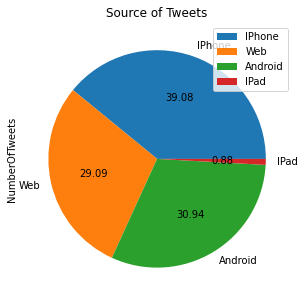

In [ ]:
q1= spark.sql("select count(*) as NumberOfTweets, 'Android' as Source from stuData where Client like '%Twitter for Android%' UNION select count(*) as NumberOfTweets, 'IPhone' as Source from stuData where Client like '%Twitter for iPhone%' UNION select count(*) as NumberOfTweets, 'IPad' as Source from stuData where Client like '%Twitter for iPad%' UNION select count(*) as NumberOfTweets, 'Web' as Source from stuData where Client like '%Twitter Web App%'")
pd1 = q1.toPandas()
print(pd1)
pd1.plot.pie(y='NumberOfTweets', labels=['IPhone', 'Web', 'Android', 'IPad'], autopct='%.2f', figsize=(5, 5),
                  title="Source of Tweets").figure  


DataFrame[count: bigint, MediaType: string]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


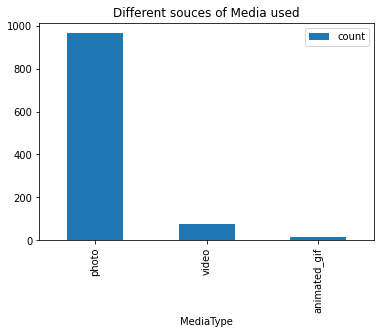

In [ ]:
query2 = spark.sql("select count(*) as count,`Media Type` as MediaType from stuData where `Media Type` is not null group by `Media Type` order by count desc")
print(query2)
pd2 = query2.toPandas()
pd2.plot(kind="bar", x="MediaType", y="count", title="Different souces of Media used").figure

DataFrame[count: bigint, Language: string]


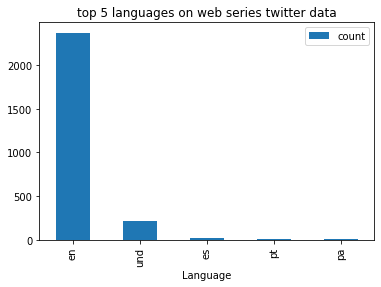

In [ ]:
query3 = spark.sql("select count(*) as count,Language as Language from stuData where Language is not null group by Language order by count desc limit 5")
print(query3)
pd3 = query3.toPandas()
pd3.plot(kind="bar", x="Language", y="count", title="top 5 languages on web series twitter data").figure

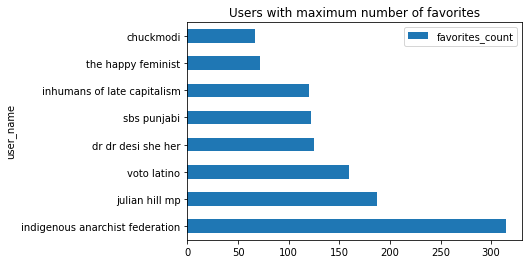

In [ ]:
query4 = spark.sql(
         "select Name as user_name, int(Favorites) as favorites_count from stuData order by favorites_count desc limit 10").dropDuplicates()
pd4 = query4.toPandas()
pd4.plot.barh(x='user_name',y='favorites_count',title="Users with maximum number of favorites").figure

   count                    text
0   1169                      US
1    893                     h1b
2    398                    Visa
3     85  International Students
4     38                   covid


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


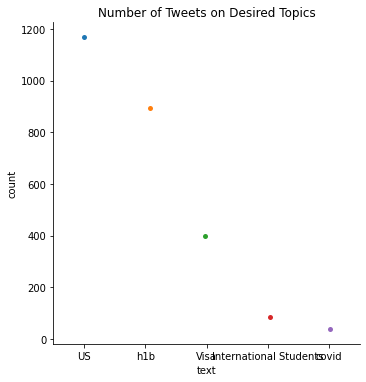

In [ ]:
query6 = spark.sql(
         "select count(*) as count,q.Text as text from (select case when Text like '%f1visa%' then 'F1 Visa' when Text like '%international students%' then 'International Students' when Text like '%travel%' then 'Travel' when Text like '%visa%' then 'Visa' when Text like '%vaccine%' then 'Vaccine' when Text like '%covid%' then 'covid' when Text like '%us%' then 'US' else 'h1b' end as Text from stuData)q group by q.Text order by count desc limit 5")
pd6 = query6.toPandas()
print(pd6)
plot= sns.catplot(x='text', y='count', data=pd6).set(title="Number of Tweets on Desired Topics")
plot.fig

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


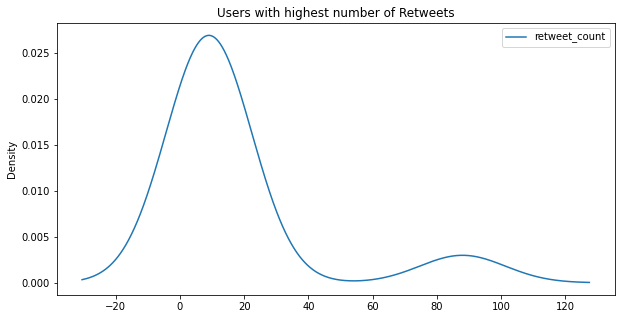

In [ ]:
query5 = spark.sql(
         "SELECT `Screen Name` as screen_name, int(Retweets) as retweet_count FROM stuData ORDER BY Retweets DESC LIMIT 20")
pd5 = query5.toPandas()
pd5.plot.density(x="screen_name", y="retweet_count",title='Users with highest number of Retweets',figsize=(10,5)).figure

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


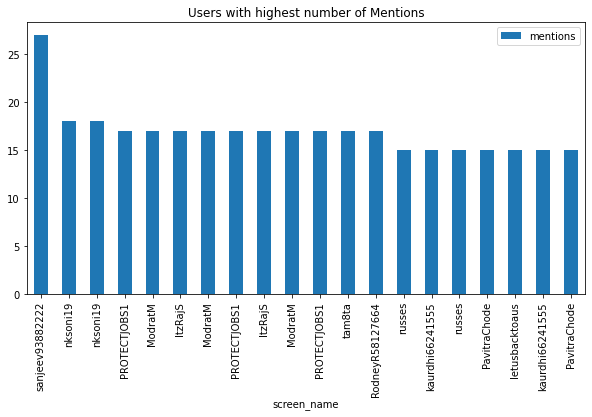

In [ ]:
query6 = spark.sql(
         "SELECT `Screen Name` as screen_name, int(Mentions) as mentions FROM stuData ORDER BY Mentions DESC LIMIT 20")
pd6 = query6.toPandas()
pd6.plot.bar(x="screen_name", y="mentions",title='Users with highest number of Mentions',figsize=(10,5)).figure

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


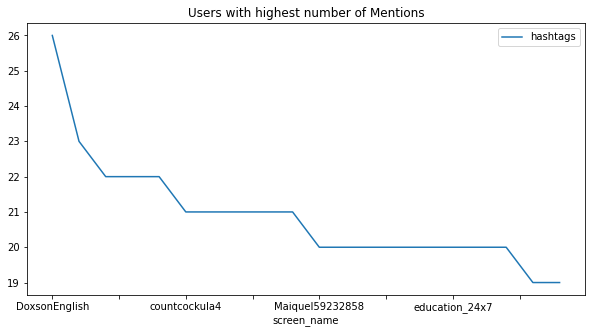

In [ ]:
query7 = spark.sql(
         "SELECT `Screen Name` as screen_name, int(Hashtags) as hashtags FROM stuData ORDER BY Hashtags DESC LIMIT 20")
pd7 = query7.toPandas()
pd7.plot.line(x="screen_name", y="hashtags",title='Users with highest number of Mentions',figsize=(10,5)).figure

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


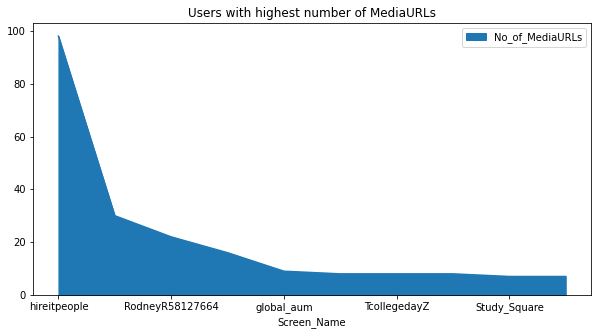

In [ ]:
query8= spark.sql("select `Screen Name` as Screen_Name,count(`Media URLs`) as No_of_MediaURLs from stuData group by `Screen Name`order by No_of_MediaURLs DESC limit 10")

pd8 = query8.toPandas()
pd8.plot.area(x="Screen_Name", y="No_of_MediaURLs",title='Users with highest number of MediaURLs',figsize=(10,5)).figure

DataFrame[count: bigint, TweetType: string]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


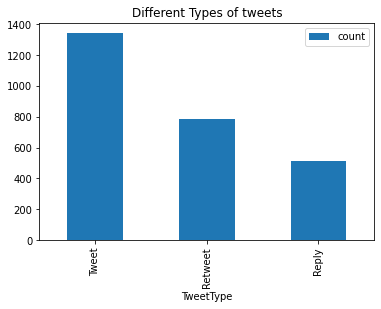

In [ ]:
query9 = spark.sql("select count(*) as count,`Tweet Type` as TweetType from stuData where `Tweet Type` is not null group by `Tweet Type` order by count desc limit 5")
print(query9)
pd9 = query9.toPandas()
pd9.plot(kind="bar", x="TweetType", y="count", title="Different Types of tweets").figure